In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def summed_signal(t, A, f, C=0):
    """Creates a signal with multiple frequencies."""
    return A[0] * np.sin(2 * np.pi * f[0]*t) + A[1] * np.sin(2 * np.pi * f[1]*t) + A[2]*np.sin(2 * np.pi * f[2]*t) + C

T0 = 0.5 # Signal period
N = 1000 # Number of samples
dt = T0/N # Time step
t = np.arange(0, 3*T0, dt)  # Time points

f = np.array([1/T0, 2/T0, 3/T0]) # Frequencies
A = np.array([-10, 5, 8]) # Amplitudes
C = 4  # DC Offset

summed = summed_signal(t, A, f, C)

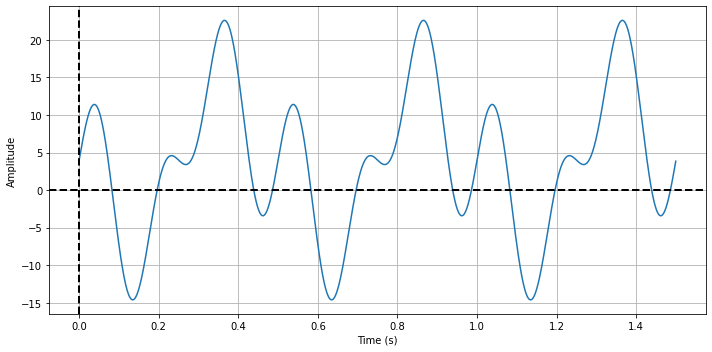

In [3]:
plt.figure(figsize=(10, 5))

plt.plot(t, summed)

plt.axvline(x=0, color='k', linestyle='--', lw=2)
plt.axhline(y=0, color='k', linestyle='--', lw=2)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.grid()
plt.tight_layout()

In [4]:
def compute_cn(t_, f, n):
    """Computes the Fourier coefficient c_n for a given time array.
    Assumes that the time array is evenly spaced. f is the signal 
    and must have the same length as t."""
    dt = t_[1] - t_[0]
    
    return 1/T0 * np.sum(f * np.exp(-1j * 2 * np.pi * n * t_/T0)) * dt

def compute_power_spectrum(t_, f, N):
    """Computes the power spectrum for a given time array and signal.
    Returns the coefficients from -N,N."""
    cn = np.zeros(2 * N + 1, dtype=complex)
    for n in range(-N , N + 1):
        cn[n + N] = compute_cn(t_, f, n)
    return cn

In [5]:
t_ = np.arange(0, T0, dt)  # Time points for a single period
N = 10 # Number of coefficients (2N+1)
freqs = np.arange(-N, N+1) / T0 # Frequencies

cn = compute_power_spectrum(t_, summed[:len(t_)], N) # Compute the coefficients

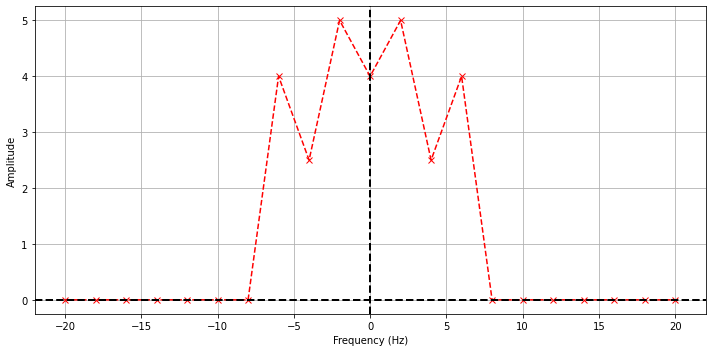

In [6]:
plt.figure(figsize=(10, 5))

plt.plot(freqs, np.abs(cn), '--rx')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)

plt.tight_layout()
plt.grid()

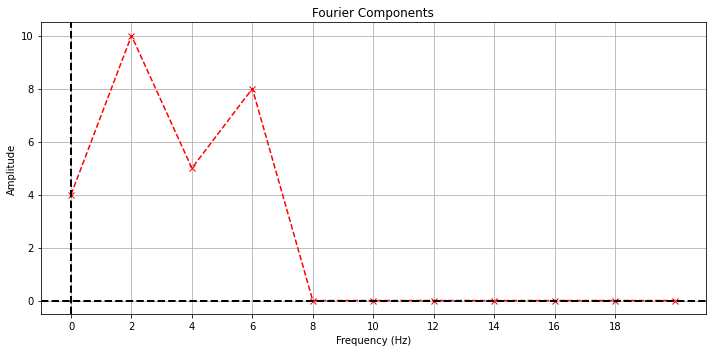

In [7]:
plt.figure(figsize=(10, 5))

x = np.insert(freqs[N+1:], 0, freqs[N])
y = np.insert(2*np.abs(cn[N+1:]), 0, np.abs(cn[N]))

plt.plot(x, y, '--rx')

plt.title('Fourier Components')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)
plt.xticks(np.arange(0,20,2))

plt.tight_layout()
plt.grid()

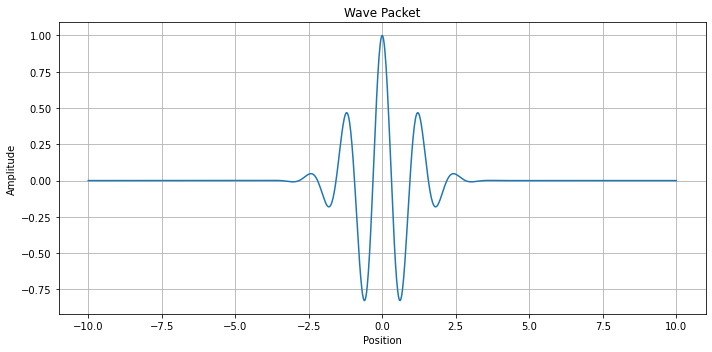

In [8]:
# Define the wave packet parameters
k0 = 5  # central wavenumber
x0 = 0  # initial position
spread = 1  # spread of the packet

# Create a space vector
x = np.linspace(-10, 10, 1000)

# Define the wave packet function
def wave_packet(x, k0, x0, spread):
    return np.exp(-0.5 * ((x - x0) / spread) ** 2) * np.cos(k0 * x)

# Calculate the wave packet
psi = wave_packet(x, k0, x0, spread)

# Plot the wave packet
plt.figure(figsize=(10, 5))
plt.plot(x, psi)
plt.title('Wave Packet')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

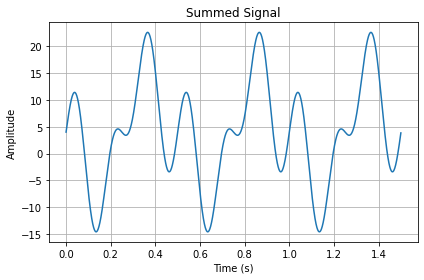

In [9]:
from numpy.fft import fft, fftfreq

plt.figure(figsize=(6, 4))
plt.plot(t, summed)

plt.title('Summed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.grid()

In [10]:
t_ = np.arange(0, T0, dt)  # Time points for a single period
one_cycle = summed[:len(t_)] # One cycle of the summed signal
N = int(T0/dt/2) # Maximum number of coefficients

fft_summed = fft(one_cycle)
freqs_array = fftfreq(len(one_cycle), dt)

x = freqs_array[:N]
y = np.insert(2*np.abs(fft_summed[1:N]), 0, np.abs(fft_summed[0]))


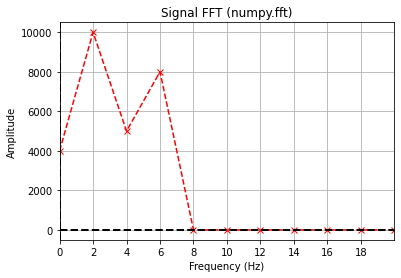

In [11]:
plt.plot(x, y, '--rx')

plt.title('Signal FFT (numpy.fft)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)

plt.xlim(0, 20)
plt.xticks(np.arange(0,20,2))

plt.grid()

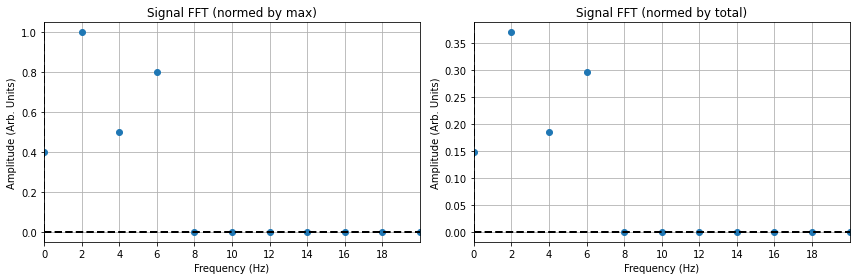

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(x, y/np.max(y), 'o')
plt.xlim(0,20)
plt.xticks(np.arange(0,20,2))

plt.title('Signal FFT (normed by max)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Arb. Units)')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)

plt.grid()

plt.subplot(122)
plt.plot(x, np.abs(y)/np.sum(y), 'o')
plt.xlim(0,20)
plt.xticks(np.arange(0,20,2))

plt.title('Signal FFT (normed by total)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Arb. Units)')

plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.axvline(x=0, color='k', linestyle='--', lw=2)

plt.tight_layout()
plt.grid()

In [13]:
## your code here